In [70]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [71]:
#df_path='C:/Users/anton/Documents/Master 2/Mémoire/Scripts/climategrid_196104.csv'
#df_path='C:/Users/anton/Documents/Master 2/Mémoire/Scripts/climategrid_196306.csv'
df_path='C:/Users/anton/Documents/Master2/Memoire/Scripts/data_belgium/climategrid_201406.csv'
df=pd.read_csv(df_path,delimiter=';')
df.head()
#df['precip_quantity'].mean()

,pixel_id,day,temp_max,temp_min,temp_avg,precip_quantity,humidity_relative,sun_duration,short_wave_from_sky,evapotrans_ref
0,1,2014/06/01,22.15,9.07,15.65,0.00,69.66,7.34,6.13,3.89
1,1,2014/06/02,22.79,5.15,13.97,0.00,65.30,14.02,7.61,4.50
2,1,2014/06/03,21.27,6.59,13.93,3.14,75.03,5.32,4.36,2.87
3,1,2014/06/04,17.16,9.55,13.35,17.92,95.40,0.75,2.68,1.48
4,1,2014/06/05,18.72,5.09,11.91,0.00,71.13,8.85,6.26,3.51


In [72]:
wanted_quantity='precip_quantity'

In [73]:
mean_precip = df.groupby('pixel_id')[wanted_quantity].sum().reset_index() #you coud also calculate the mean quantity if you want
mean_precip.head()

,pixel_id,precip_quantity
0,1,60.05
1,2,61.45
2,3,61.02
3,4,56.63
4,5,64.80


In [74]:
coord_path='C:/Users/anton/Documents/Master2/Memoire/Scripts/data_belgium/climategrid_pixel_metadata.csv'
pixel_coord=pd.read_csv(coord_path,delimiter=';')
pixel_coord.head()


,PIXEL_ID,PIXEL_LAT_CENTER,PIXEL_LON_CENTER
0,1,49.510015,5.419101
1,2,49.509469,5.488333
2,3,49.508882,5.557563
3,4,49.508253,5.626792
4,5,49.554969,5.419910


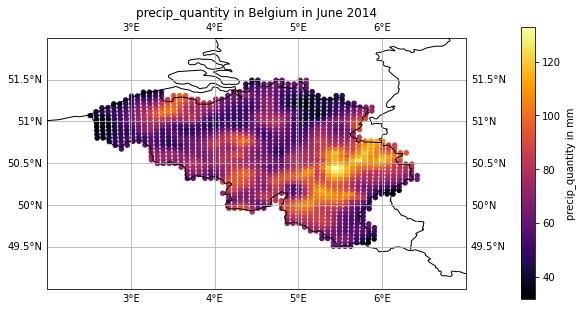

In [75]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure and add a map projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Set longitude and latitude limits
ax.set_extent([2, 7, 49, 52], crs=ccrs.PlateCarree())

#plot the pixels with the mean precipitation
merged_df = pd.merge(pixel_coord, mean_precip, left_on='PIXEL_ID', right_on='pixel_id')
sc = ax.scatter(
    merged_df['PIXEL_LON_CENTER'], 
    merged_df['PIXEL_LAT_CENTER'], 
    c=merged_df[wanted_quantity], 
    cmap='inferno', 
    s=20
)
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label(f'{wanted_quantity} in mm')

plt.title(f'{wanted_quantity} in Belgium in June 2014')
plt.show()